<a href="https://colab.research.google.com/github/KESHAVNATH8/Machine-Learning-Project/blob/main/ML_SalaryEstimation_Project3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving salary.csv to salary.csv


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('salary.csv')

In [4]:
df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


In [5]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [6]:
df.tail()

,age,education.num,capital.gain,hours.per.week,income
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0
32560,22,9,0,20,0


In [7]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [8]:
df.tail(10)

,age,education.num,capital.gain,hours.per.week,income
32551,43,10,0,50,0
32552,32,6,0,40,0
32553,43,11,0,45,0
32554,32,14,0,11,0
32555,53,14,0,40,1
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0
32560,22,9,0,20,0


In [10]:
df.shape

(32561, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   education.num   32561 non-null  int64
 2   capital.gain    32561 non-null  int64
 3   hours.per.week  32561 non-null  int64
 4   income          32561 non-null  int64
dtypes: int64(5)
memory usage: 1.2 MB


In [11]:
df.describe()

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456,0.240810
std,13.640433,2.572720,7385.292085,12.347429,0.427581
min,17.000000,1.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,99.000000,1.000000


In [12]:
df.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [13]:
df['age']

0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64

In [14]:
df.isnull()

,age,education.num,capital.gain,hours.per.week,income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
32556,False,False,False,False,False
32557,False,False,False,False,False
32558,False,False,False,False,False
32559,False,False,False,False,False


In [15]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [19]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2)

In [23]:
len(x_train)

26048

In [24]:
len(x_test)

6513

In [25]:
len(y_train)

26048

In [26]:
len(y_test)

6513

In [29]:
x_train.shape

(26048, 4)

In [30]:
x_test.shape

(6513, 4)

In [31]:
y_test.shape

(6513,)

In [32]:
y_train.shape

(26048,)

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
x_train

array([[ 0.84090291, -0.41567673, -0.14508672, -0.03191658],
       [-0.18865474,  1.14011714, -0.14508672,  1.1879255 ],
       [ 1.87046057, -0.41567673, -0.14508672,  0.37469745],
       ...,
       [ 1.64984107, -0.41567673, -0.14508672, -0.4385306 ],
       [ 0.10550459,  1.14011714,  0.90851861,  2.08247635],
       [ 0.39966392,  1.14011714, -0.14508672,  0.37469745]])

In [37]:
x_test

array([[3.40000000e+01, 1.30000000e+01, 1.70611972e-15, 6.00000000e+01],
       [5.80000000e+01, 9.00000000e+00, 1.70611972e-15, 4.00000000e+01],
       [2.20000000e+01, 9.00000000e+00, 1.70611972e-15, 4.00000000e+01],
       ...,
       [4.90000000e+01, 1.00000000e+01, 1.70611972e-15, 4.50000000e+01],
       [2.80000000e+01, 9.00000000e+00, 1.70611972e-15, 4.00000000e+01],
       [4.80000000e+01, 1.50000000e+01, 1.70611972e-15, 4.50000000e+01]])

Text(0, 0.5, 'Mean Error')

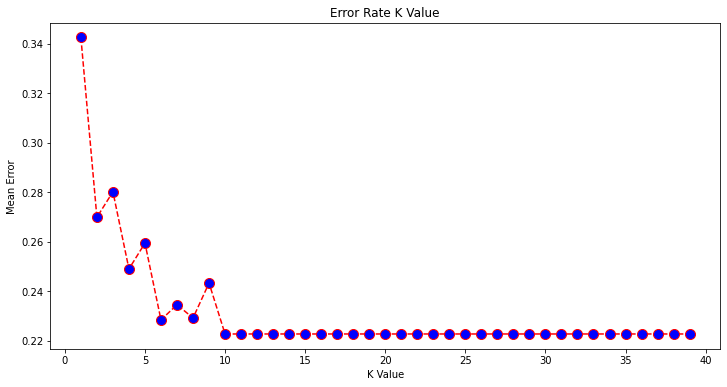

In [42]:
error = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [43]:
model = KNeighborsClassifier(n_neighbors = 6, metric = "minkowski")

In [44]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [45]:
y_pred = model.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred) * 100

77.15338553661907

In [55]:
Age = input("enetr employess age?")
edu_num = input("enter employees edu num.?")
cg = input("employees cg?")
work_hours = input("enter the work hours of the employees?")
newemp = [[Age,edu_num,cg,work_hours]]
result = model.predict(sc.transform(newemp))
print(result)

if result == 1:
  print(" Salary greater than 50k")
else:
  print(" Salary lesser than 50k")


enetr employess age?25
enter employees edu num.?9
employees cg?0
enter the work hours of the employees?40
[0]
 Salary lesser than 50k
